In [59]:
import glob
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

dir = "/ifs/scratch/jls106_gp/nhw2114/data/20231106_synthetic_data"

eakf_metrics_df = pd.read_csv(dir + '/eakf_metrics_all.csv')

# Epiestim metrics
files = glob.glob(dir + '/*_epiEstim_metrics.csv')
print(len(files))

dfs = []
for file in tqdm(files):
    df = pd.read_csv(file)
    param = os.path.basename(file).split("_")[0]
    df["param"] = param
    dfs.append(df)

epiestim_metrics_df = pd.concat(dfs, ignore_index=False)

47871


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47871/47871 [02:20<00:00, 340.62it/s]
/tmp/9426503.1.int.q/ipykernel_24361/2601475682.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  epiestim_metrics_df = pd.concat(dfs, ignore_index=False)


In [66]:
epiestim_metrics_df[epiestim_metrics_df.param == '62711']

,window,rt_peak_rmse,rt_rmse,rt_last_epi_day_rmse,data_rmse,data_rmse_last_epi_day,avg_w2,avg_kl,avg_w2_last_epi_day,avg_kl_last_epi_day,in_ci,ens_var,in_ci_last_day,ens_var_last_day,in_ci_last_epi_day,ens_var_last_epi_day,param
0,1,0.490382,8.345871,0.462359,252.901754,123.515249,0.499817,1.232894,0.488225,1.849860,True,2.251592,True,67.311061,True,0.763260,62711
1,2,0.273426,5.680242,0.323202,193.586836,146.251715,0.434417,0.975155,0.326420,1.399065,True,1.034475,True,41.068166,True,0.659105,62711
2,3,0.123531,4.259643,0.269114,159.812011,155.560621,0.460680,0.912330,0.302157,1.331372,True,0.904260,True,30.243345,True,0.535990,62711
3,4,0.088590,3.538684,0.230412,149.807573,167.461650,0.526574,1.151617,0.267497,1.558201,False,0.412270,True,55.331210,True,0.427948,62711
4,5,0.084803,3.070437,0.205815,163.522845,195.453504,0.636873,1.665692,0.356372,2.079609,False,0.372927,True,25.857068,True,0.350043,62711
5,6,0.063807,2.743293,0.188603,174.343405,220.650410,0.715231,2.034020,0.409210,2.328893,False,0.226691,True,20.839367,True,0.268594,62711
6,7,0.088696,2.473315,0.174299,200.797816,233.495295,0.783989,2.883837,0.488119,3.182445,False,0.145870,True,16.076503,True,0.218677,62711
7,8,0.132404,2.285138,0.167820,235.764137,252.518727,0.840985,4.158176,0.579227,3.921400,True,0.110267,True,13.042443,True,0.255892,62711
8,9,0.142721,2.138927,0.159954,256.181533,271.425306,0.906151,4.882493,0.727756,4.747367,True,0.084863,True,13.459349,True,0.214500,62711
9,10,0.162494,1.985094,0.155228,285.028966,296.231041,0.920444,7.786910,0.798218,6.275673,True,0.066204,True,10.778370,True,0.182465,62711


In [61]:
set(pd.read_csv('good_param_list.csv')['param']) - set(int(p) for p in epiestim_metrics_df['param'].unique())

{688}

In [3]:
eakf_metrics_df[["method", 'rt_peak_rmse', 'rt_rmse', 'data_rmse', 'avg_w2', 'avg_kl',
                 'in_ci', 'ens_var', 'in_ci_last_day', 'ens_var_last_day']].groupby("method").mean().round(4)

,rt_peak_rmse,rt_rmse,data_rmse,avg_w2,avg_kl,in_ci,ens_var,in_ci_last_day,ens_var_last_day
method,,,,,,,,,
adaptive inflation,0.0848,0.3743,47.1550,0.6422,0.9526,0.6627,0.0191,0.9742,0.0207
fixed inflation,0.0441,0.5993,68.9347,0.8112,3.3069,0.1729,0.0053,0.4320,0.0010
no inflation,0.0247,1.7630,117.3201,0.9888,7.1591,0.0000,0.0000,0.0000,0.0000
smooth,0.0436,0.2533,58.4985,0.3840,0.9687,0.5434,0.0045,0.9715,0.0192


In [4]:
epiestim_metrics_df[['window', 'rt_peak_rmse', 'rt_rmse', 'rt_last_epi_day_rmse',
       'data_rmse', 'data_rmse_last_epi_day', 'avg_w2', 'avg_kl',
       'avg_w2_last_epi_day', 'avg_kl_last_epi_day', 'in_ci', 'ens_var',
       'in_ci_last_day', 'ens_var_last_day', 'in_ci_last_epi_day',
       'ens_var_last_epi_day']].groupby('window').mean(numeric_only=False).round(4)

,rt_peak_rmse,rt_rmse,rt_last_epi_day_rmse,data_rmse,data_rmse_last_epi_day,avg_w2,avg_kl,avg_w2_last_epi_day,avg_kl_last_epi_day,in_ci,ens_var,in_ci_last_day,ens_var_last_day,in_ci_last_epi_day,ens_var_last_epi_day
window,,,,,,,,,,,,,,,
1,0.4613,23.9359,0.9311,254.0760,192.6008,0.4916,1.7043,0.4965,1.7558,0.593616,0.8249,0.80834,813.7731,0.942799,5.4488
2,0.2869,17.1648,0.6541,211.7498,192.1256,0.3943,1.2914,0.3970,1.3468,0.594242,0.3486,0.748527,421.7495,0.875716,3.2275
3,0.2161,13.6660,0.5476,196.8063,199.3446,0.3638,1.2028,0.3637,1.2672,0.602808,0.2050,0.74579,230.0209,0.846405,2.3368
4,0.2097,11.5233,0.4926,203.9594,222.4416,0.4056,1.4594,0.4031,1.5390,0.588643,0.1392,0.743722,149.8585,0.844587,1.8803
5,0.2467,10.0962,0.4639,228.5261,259.6516,0.4977,2.1200,0.4932,2.2203,0.563155,0.1016,0.661743,142.6943,0.838319,1.6133
6,0.3012,9.0737,0.4500,262.3761,303.8787,0.5993,3.0949,0.5935,3.2179,0.533364,0.0781,0.670998,98.0822,0.844357,1.4612
7,0.3611,8.3235,0.4439,299.2871,349.1958,0.6912,4.2163,0.6849,4.3584,0.501609,0.0617,0.68393,73.6533,0.849914,1.3433
8,0.4201,7.7669,0.4433,337.1090,394.2579,0.7714,5.3592,0.7657,5.5067,0.473174,0.0501,0.664884,66.3955,0.851538,1.2603
9,0.4749,7.3398,0.4476,373.7662,437.4510,0.8404,6.4444,0.8362,6.5818,0.444718,0.0413,0.600681,58.7230,0.851078,1.2028


/ifs/scratch/jls106_gp/nhw2114/anaconda3/envs/epyfilter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ifs/scratch/jls106_gp/nhw2114/anaconda3/envs/epyfilter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ifs/scratch/jls106_gp/nhw2114/anaconda3/envs/epyfilter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/ifs/scratch/jls106_gp/nhw2114/anaconda3/envs/epyfilter/lib/python3.11/site-packages/seaborn/_oldcore.py:1

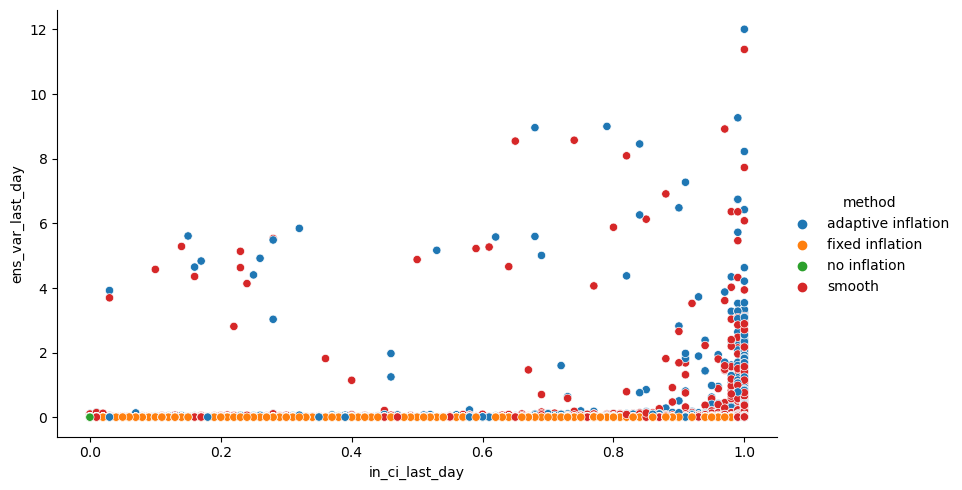

In [6]:
import seaborn as sns

_methods = ['adaptive inflation', 'fixed inflation', 'no inflation', 'smooth']
sns.relplot(data=eakf_metrics_df, x='in_ci_last_day', y='ens_var_last_day', hue='method', hue_order=_methods, aspect=1.61)
plt.show()

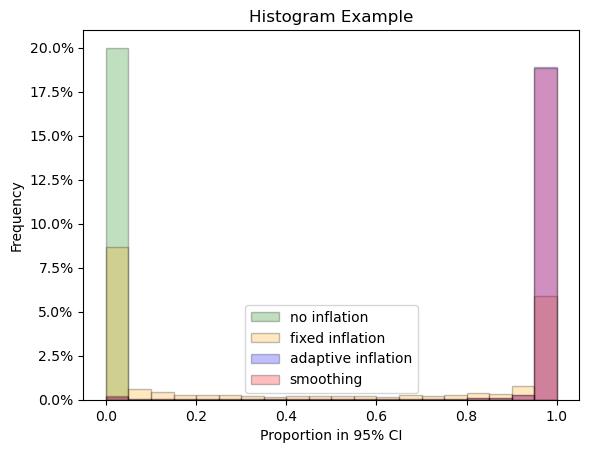

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
no_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "no inflation", "in_ci_last_day"]
fix_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "fixed inflation", "in_ci_last_day"]
adapt_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "in_ci_last_day"]
smooth_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "smooth", "in_ci_last_day"]
ax.hist(no_ci, bins=20, color='green', label="no inflation", edgecolor='black', alpha=0.25, density=True, range=[0.0, 1.0])
ax.hist(fix_ci, bins=20, color='orange', label="fixed inflation", edgecolor='black', alpha=0.25, density=True)
ax.hist(adapt_ci, bins=20, color='blue', label="adaptive inflation", edgecolor='black', alpha=0.25, density=True) 
ax.hist(smooth_ci, bins=20, color='red', label="smoothing", edgecolor='black', alpha=0.25, density=True) 

ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Histogram Example')
plt.xlabel('Proportion in 95% CI')
plt.ylabel('Frequency')
plt.legend()

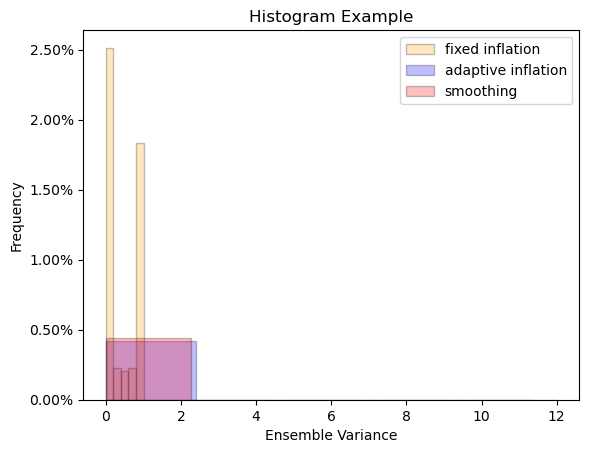

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
no_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "no inflation", "ens_var_last_day"]
# fix_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "fixed inflation", "ens_var_last_day"]
adapt_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "ens_var_last_day"]
smooth_ci = eakf_metrics_df.loc[eakf_metrics_df["method"] == "smooth", "ens_var_last_day"]

# ax.hist(no_ci, bins=5, color='green', label="no inflation", edgecolor='black', alpha=0.25, density=True, range=[0.0, 1.0])
ax.hist(fix_ci, bins=5, color='orange', label="fixed inflation", edgecolor='black', alpha=0.25, density=True)
ax.hist(adapt_ci, bins=5, color='blue', label="adaptive inflation", edgecolor='black', alpha=0.25, density=True) 
ax.hist(smooth_ci, bins=5, color='red', label="smoothing", edgecolor='black', alpha=0.25, density=True) 

# ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.title('Histogram Example')
plt.xlabel('Ensemble Variance')
plt.ylabel('Frequency')
plt.legend()

In [16]:
# from scipy.stats.kde import gaussian_kde

# x = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "in_ci_last_day"]
# y = eakf_metrics_df.loc[eakf_metrics_df["method"] == "adaptive inflation", "ens_var_last_day"]
# Z, xedges, yedges = np.histogram2d(x, y,bins=5)
# plt.pcolormesh(xedges, yedges, Z.T)
# plt.colorbar()



# MISC

In [43]:
dir = "/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/pdf_archive"
len(os.listdir(dir))

218167

# Compute last day

In [56]:
import pickle
from epyfilter import simulate_data

good_param_df = pd.read_csv("good_param_list.csv")
pickle_list = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{param}_synthetic_data.pkl" for param in good_param_df.param]

def open_pickle(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

last_day_array = np.empty(shape=(len(pickle_list), 2))

In [60]:
for i, pp in enumerate(tqdm(pickle_list)):
    param = os.path.basename(pp).split("_")[0]
    data = open_pickle(pp)
    if len(np.where(data.i_true == 0)[0]) == 1:
        last_day = len(data.i_true)
    else:
        last_day = np.where(data.i_true == 0)[0][1]
    last_day_array[i] = [param, last_day]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47871/47871 [35:25<00:00, 22.52it/s]


In [66]:
last_day_df = pd.DataFrame(last_day_array, columns=['param','last_epidemic_day'], dtype=int)
last_day_df.to_csv("/ifs/scratch/jls106_gp/nhw2114/repos/rt-estimation/src/epyfilter/c2b2/last_epidemic_day.csv", index=False)

In [69]:
last_day_df[last_day_df.last_epidemic_day.isna()]

,param,last_epidemic_day


# COMPUTE LAST DAY, PEAKS, DATA DISTRIBUTION, AND 

In [36]:
import pickle
from epyfilter import simulate_data
from tqdm import tqdm

good_param_df = pd.read_csv("good_param_list.csv")
pickle_list = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{param}_synthetic_data.pkl" for param in good_param_df.param]

def compute_late_day(data):
    beta_1 = data.rt_1 / data.t_I
    beta_0 = data.rt_0 / data.t_I
    late_day = -1/data.k * np.log((beta_1 - beta_0)/(0.99*beta_1 - beta_0)-1) + data.midpoint
    late_day = int(late_day)
    return late_day

def compute_peaks(data):
    det_data = simulate_data.simulate_data(**data.true_params, run_deterministic=True)
    peak_days, = np.where(np.diff(np.sign(np.diff(det_data.i_true))) == -2)  # days where it increases before then decreases
    peak_days = peak_days[:2]  # just take first two days
    return peak_days

def open_pickle(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

In [37]:
data_files = glob.glob(dir + '/*_data_distribution.csv')
done_params = [int(os.path.basename(f).split("_")[0]) for f in data_files]
todo_params = list(set(good_param_df.param) - set(done_params))

pickle_list = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{param}_synthetic_data.pkl" for param in todo_params]

In [39]:
pickle_list = ["/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/71564_synthetic_data.pkl"]

In [40]:
for pp in tqdm(pickle_list):
    param = os.path.basename(pp).split("_")[0]
    data = open_pickle(pp)
    data_distribution_df = pd.DataFrame(data.data_distribution, columns=[f"sample{x}" for x in range(1,301)])
    data_distribution_df["day"] = range(len(data_distribution_df))
    data_distribution_df["late_day"] = compute_late_day(data)
    peaks = compute_peaks(data)
    data_distribution_df["peak1"] = peaks[0]
    data_distribution_df["peak2"] = peaks[1]
    
    data_distribution_df.to_csv(f"{dir}/{param}_data_distribution.csv", index=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


In [42]:
len(glob.glob(dir + '/*_data_distribution.csv'))

47871

# Fix Single Epidemics

In [7]:
pickles = glob.glob(dir + '/*.pkl')

In [8]:
import pickle
def open_pickle(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100185/100185 [3:04:18<00:00,  9.06it/s]


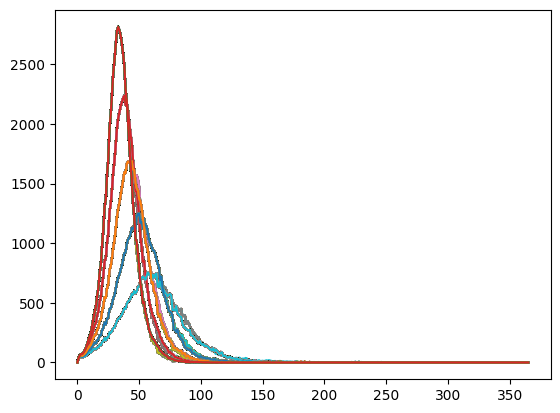

In [10]:
from tqdm import tqdm
from scipy.signal import find_peaks

bad_params = []
for file in tqdm(pickles):
    data = open_pickle(file)

    window_size = 10  # Adjust this window size as needed
    smoothed_data = np.convolve(data.i_true, np.ones(window_size) / window_size, mode='valid')
    peaks, _ = find_peaks(smoothed_data, height=100, prominence=10)
    if len(peaks) < 2:
        bad_params.append(file)
        plt.plot(data.i_true)

In [11]:
len(bad_params)

52314

In [14]:
pd.DataFrame(bad_params).to_csv("one_epidemic_curve.csv", index=False)

In [18]:
bad_metric_files = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{os.path.basename(b).split('_')[0]}_eakf_metrics.csv" for b in bad_params]

In [21]:
dfs = []
for file in tqdm(files):
    if file not in bad_metric_files:
        df = pd.read_csv(file)
        param = os.path.basename(file).split("_")[0]
        df["param"] = param
        dfs.append(df)

good_combined_df = pd.concat(dfs, ignore_index=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100185/100185 [07:22<00:00, 226.36it/s]


In [22]:
good_combined_df[["method", "rt_peak_rmse", "rt_rmse", "data_rmse", "avg_w2", "avg_kl", "in_ci"]].groupby("method").mean()

,rt_peak_rmse,rt_rmse,data_rmse,avg_w2,avg_kl,in_ci
method,,,,,,
adaptive inflation,0.084815,0.374231,47.154245,0.642203,0.952536,0.662593
fixed inflation,0.044096,0.599377,68.936821,0.811197,3.306851,0.172927
no inflation,0.024710,1.763012,117.320087,0.988873,7.159461,0.000000
smooth,0.043557,0.253248,58.496632,0.383990,0.968416,0.543410


Text(0, 0.5, 'Count')

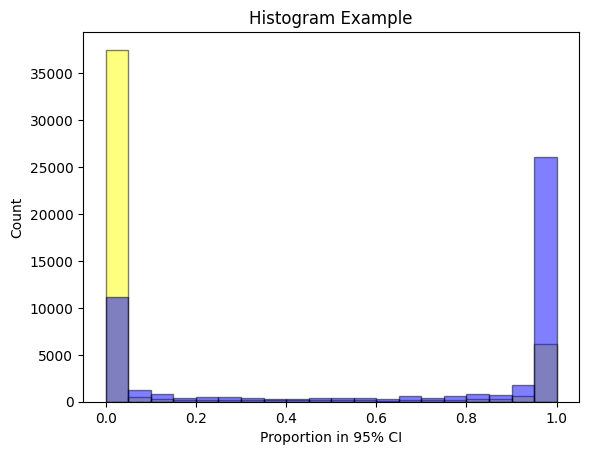

In [23]:
plt.hist(good_combined_df.loc[good_combined_df["method"] == "fixed inflation", "in_ci"], bins=20, color='yellow', edgecolor='black', alpha=0.5)
plt.hist(good_combined_df.loc[good_combined_df["method"] == "adaptive inflation", "in_ci"], bins=20, color='blue', edgecolor='black', alpha=0.5)
plt.title('Histogram Example')
plt.xlabel('Proportion in 95% CI')
plt.ylabel('Count')

In [42]:
pd.DataFrame(good_combined_df.param.unique(), columns=["param"]).to_csv("good_param_list.csv", index=False)

In [45]:
df = pd.read_csv("good_param_list.csv")
pickle_files = df.iloc[1:1000, 0]

In [46]:
pickle_files = [f"/ifs/scratch/jls106_gp/nhw2114/data/20231025_synthetic_data/{p}_synthetic_data.pkl" for p in pickle_files]

In [51]:
4788/200 * 3

71.82000000000001

In [55]:
files = glob.glob(dir + '/*_for_epiestim.csv')

In [58]:
pd.read_csv(files[0])

,rt,i,prop_S
0,1.3,33.742320,0.99869
1,1.3,42.500996,0.99826
2,1.3,45.972273,0.99778
3,1.3,38.297496,0.99736
4,1.3,38.854358,0.99690
...,...,...,...
360,4.7,0.000000,0.58860
361,4.7,0.396479,0.58860
362,4.7,0.000000,0.58860
363,4.7,0.000000,0.58860
